# Analysis HLoc time

### Init and load data

In [3]:
import os
import numpy as np 
from matplotlib import pyplot as plt

SFM_DATAROOT = '/data2/sfm/single_session'
SCAN = 'vins_hard_loop'
FRAME_RATE = 15 # Hz
FONT = 14   
timing_file = os.path.join(SFM_DATAROOT, SCAN, 'match_timing.txt')
data = np.loadtxt(timing_file, delimiter=' ', skiprows=1)
data =  data[1:, :]
print('Load data from', timing_file)

seq_length = data[:, 0]
global_match = data[:, 2]
local_match = data[:, 3]
pnp = data[:, 4]
timestamp = seq_length / FRAME_RATE # seconds

Load data from /data2/sfm/single_session/vins_hard_loop/match_timing.txt


### Plot timing

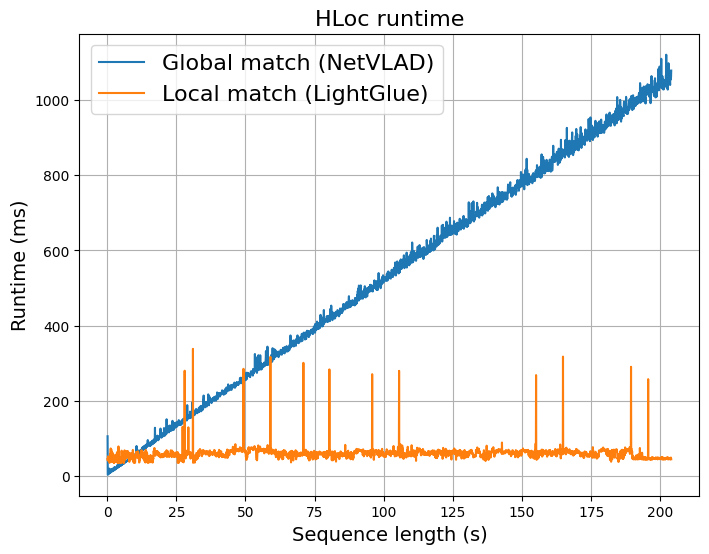

In [4]:
# plot global match over sequence length
# plt.figure()
plt.figure(figsize=(8, 6))

plt.plot(timestamp, global_match, label='Global match (NetVLAD)')
plt.plot(timestamp, local_match, label='Local match (LightGlue)')
plt.xlabel('Sequence length (s)', fontsize=FONT)
plt.ylabel('Runtime (ms)', fontsize=FONT)
plt.legend(fontsize=16)
plt.grid()
plt.title('HLoc runtime', fontsize=16)

plt.savefig(os.path.join(SFM_DATAROOT, SCAN, 'hloc_timing.png'))
plt.show()